# SCC-ICMC-USP 


#CURSO 2 - CD-AM-DM
#Exemplo 7 - COMITES DE ÁRVORES DE DECISÃO
#Profa. Roseli A. F. Romero

...

#OBJETIVO:
#- Encontrar a arvore que melhor classifica o conjunto breastcancer.dat, usando:
AD (DT), RF e XGB
#- Utilização de metricas de acuracia, precisão e recall no conjunto de teste.


# Parte 1

O dataset ["Breast Cancer Wisconsin"](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) é um dataset que contém 699 instâncias, cada uma com 10 atributos númericos e 1 atributo correspondente a classe. A idéia do dataset é conseguir classificar um tumor como **benigno ou maligno** a partir de 10 variáveis descritivas. Foi adicionado um cabeçalho no arquivo original para facilitar seu manuseio. Valores ausentes são representados pelo caractere '?'

---


## **Questão 01**.
#Carregue o dataset a partir do arquivo fornecido. Depois conte quantos valores ausentes existem para cada atributo.

In [ ]:
import pandas as pd
import numpy as np

data = pd.read_csv("/content/breast-cancer-wisconsin.data", na_values="?")
data.isnull().sum()

id                  0
clump_thickness     0
u_cell_size         0
u_cell_shape        0
marg_adhesion       0
epi_cell_size       0
bare_nuclei        16
bland_chrom         0
norm_nucl           0
mitoses             0
class               0
dtype: int64

## **Questão 02**.
#Separe o conjunto em $80\%$ treino e $20\%$ teste.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.iloc[:,1:-1]
y = data.iloc[:,-1]
np.random.seed(7)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, randomstate=1234)

## **Questão 03**.

#Substitua os valores ausentes utilizando a estratégia de média. Utilize a média do conjunto de treinamento para substituir valores faltantes no teste. 

In [ ]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(strategy="mean")
X_train_clean = imp.fit_transform(X_train)
X_test_clean = imp.transform(X_test)

---
## **Questão 04**.
#Treine um classificador usando o método de Árvore de Decisão usando o conjunto de treino

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

estimator_dt = DecisionTreeClassifier(random_state=42)

estimator_dt.fit(X_train_clean, y_train)
y_pred_dt = estimator_dt.predict(X_test_clean)

## **Questão 05**

#Treine um classicador usando o método Random Forest usando o conjunto de treino

In [ ]:
from sklearn.ensemble import RandomForestClassifier

estimator_rf = RandomForestClassifier()

estimator_rf.fit(X_train_clean, y_train)
y_pred_rf = estimator_rf.predict(X_test_clean)

## **Questão 6**

#Treine um classificador com o método XGBoost usando o conjunto de treino
- Dica: Utilize `xgboost.XGBRegressor`

In [ ]:
import xgboost as xgb

estimator_xg = xgb.XGBClassifier(random_state=10)

estimator_xg.fit(X_train_clean, y_train)
y_pred_xg = estimator_xg.predict(X_test_clean)

## **Questão 7**

#Compare a acurácia, precisão e revocação no conjunto de teste de cada um dos métodos.



In [ ]:
print('-------- Árvore de decisão -------------')
print("%.2f" % accuracy_score(y_test, y_pred_dt))
print("%.2f" % precision_score(y_test, y_pred_dt, pos_label=2))
print("%.2f" % recall_score(y_test, y_pred_dt, pos_label=2))

-------- Árvore de decisão -------------
0.93
0.96
0.93


In [ ]:
print('-------- Random Forest -------------')
print("%.2f" % accuracy_score(y_test, y_pred_rf))
print("%.2f" % precision_score(y_test, y_pred_rf, pos_label=2))
print("%.2f" % recall_score(y_test, y_pred_rf, pos_label=2))

-------- Random Forest -------------
0.96
0.97
0.98


In [ ]:
print('-------- XGBoost -------------')
print("%.2f" % accuracy_score(y_test, y_pred_xg))
print("%.2f" % precision_score(y_test, y_pred_xg, pos_label=2))
print("%.2f" % recall_score(y_test, y_pred_xg, pos_label=2))

-------- XGBoost -------------
0.95
0.96
0.97


## **Questão 08**.

#Utilizando o modelo de árvore de decisão treinado, visualize a árvore resultante (`sklearn.tree.plot_tree`) e diga qual é a feature mais informativa. Justifique. 

[Text(0.5, 0.875, 'X[1] <= 2.5\ngini = 0.451\nsamples = 559\nvalue = [367, 192]'),
 Text(0.25, 0.625, 'X[5] <= 6.0\ngini = 0.051\nsamples = 344\nvalue = [335, 9]'),
 Text(0.125, 0.375, 'X[7] <= 9.0\ngini = 0.018\nsamples = 337\nvalue = [334, 3]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'X[0] <= 2.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'X[2] <= 2.5\ngini = 0.253\nsamples = 215\nvalue = [32, 183]'),
 Text(0.625, 0.375, 'X[8] <= 1.5\ngini = 0.291\nsamples = 17\nvalue = [14, 3]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'X[1] <= 4.5\ngini = 0.165\nsamples = 198\nvalue = [18, 180]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

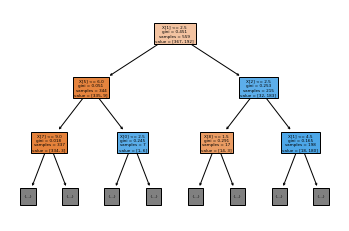

In [ ]:
from sklearn.tree import plot_tree

plot_tree(estimator_dt, filled=True, max_depth=2)

In [ ]:
X1 = data.iloc[:1,1:-1]
print(X1)


   clump_thickness  u_cell_size  u_cell_shape  marg_adhesion  epi_cell_size  \
0                5            1             1              1              2   

   bare_nuclei  bland_chrom  norm_nucl  mitoses  
0          1.0            3          1        1  


In [ ]:
y1 =[5,1,1,1,2,1.,3,1,1]
print(estimator_dt.predict([y1]))

[2]


In [ ]:
y2 = [5,1,1,1,2,1.6,3,1,1]
print(estimator_dt.predict([y2]))

[2]
